In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Conjunto de dados

## 1. Usar conjunto de dados trab4.data

In [2]:
dataset = np.genfromtxt("./data/trab4.data", delimiter=",")

## 2. Primeiras 4 colunas são as features das instâncias

In [3]:
X = dataset[:, :-1]

## 3. Última coluna é a variável alvo

In [4]:
y = dataset[:, -1]

# K-Means

## 1. Implemente o k-means usando a distância euclidiana.

In [5]:
from kmeans import KMeans

## 2. Execute o k-means para k = { 2, 3, 4, 5 }

### a. Plote a distância média de cada ponto para o seu centróide em um gráfico linha em função de k (média sobre 20 rodadas)

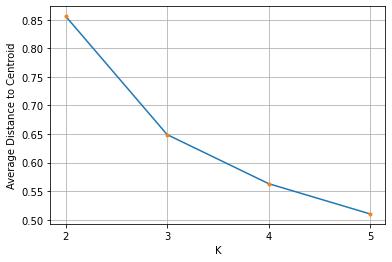

In [6]:
k = [2, 3, 4, 5]
k_average_distance = []

for k_i in k:
    km = KMeans(k_i)
    average_distances = []
    
    for _ in range(20):
        km.fit(X)
        average_distances.append(np.mean(km.distances_to_centroid))
        
    k_average_distance.append(np.mean(average_distances))
    
plt.grid()
plt.xlabel('K')
plt.ylabel('Average Distance to Centroid')
plt.xticks(k)
plt.plot(k, k_average_distance)
plt.plot(k, k_average_distance, '.')
plt.show()

### b. Discuta qual seria o k ideal a ser usado

Pela regra do cotovelo o número ideal de k seria 3 já que no gráfico acima a quebra ou "cotovelo" ocorre nesse ponto.

# PCA

## 1. Implemente o PCA

In [7]:
from pca import PCA

### a. Você deve implementar a função de calcular a matriz de covariância

In [8]:
def cov(x1, x2):
    (x1_mean, x2_mean) = (x1.mean(), x2.mean())

    return 1 / (np.shape(x1)[0] - 1) * np.sum((x1 - x1_mean) * (x2
            - x2_mean))


def cov_matrix(data):
    data_T = np.transpose(data)

    return np.array([[cov(i, j) for i in data_T] for j in data_T])


### b. A função de achar os autovetores e os autovalores pode ser usado pronto do numpy https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [9]:
# utilizado no método fit em (from pca import PCA)

## 2. Reduza o conjunto de dados original em um conjunto com apenas duas variáveis (2 componentes principais de maior autovalor)

In [10]:
pca = PCA(2)
pca.fit(X)

X_2 = pca.fit_transform(X)
X_2.shape

(150, 2)

### a. Reporte quanto de variância foi preservado

In [11]:
e_values_ratio = pca.e_values_ratio

v = np.sum(e_values_ratio[:2]) * 100
v

95.80097536148197

Foi preservada 95.8% de variância.

### b. Plote cada ponto do conjunto transformado em um gráfico de dispersão 2d  atribuindo uma cor para cada uma das classes (3 classes no total).

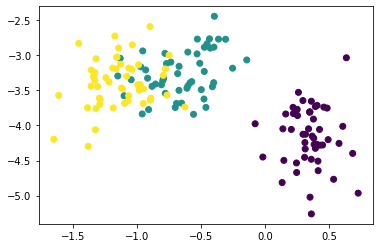

In [12]:
plt.scatter(X_2[:, 0], X_2[:, 1], c=y)

# Árvores de decisão

## 1. Implemente a árvore de decisão usando o coeficiente de Gini como mostrado em sala

In [13]:
from decision_tree import DecisionTree

## 2. Reporte o erro de classificação para o k-fold com k=5

### a. Pode usar o k-fold que foi implementado em atividades passadas ou pode usar pronto do scikit-learn

### b. Erro de classificação pode usar pronto do scikit-learn também

In [15]:
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dt = DecisionTree()
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    print(accuracy)

1.0
0.9666666666666667
0.8666666666666667
0.9333333333333333
0.7333333333333333
